# Example 9.4: Brayton Cycle (Cold-Air-Standard)

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement

Air enters the compressor of a cold air-standard Brayton cycle at $100\ \mathrm{kPa}$, $300\mathrm{K}$ with a volumetric flow rate of $5\ \mathrm{m^3/s}$.  The pressure ratio is $10$ and the turbine inlet temperature is $1400\ \mathrm{K}$.  The turbine and compressor each have an isentropic efficiency of $80\%$.

* (a) $p$-$v$ diagram
* (b) $T$-$s$ diagram
* (c) Back work ratio
* (d) Net power
* (e) $\eta_{th}$

## Solution

__[Video Explanation](https://uky.yuja.com/V/Video?v=3074251&node=10465179&a=1485165775&autoplay=1)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [1]:
from kilojoule.templates.kSI import *
    
air = realfluid.Properties('Air',unit_system='SI_K')

### Given Parameters
We now define variables to hold our known values.

In [2]:
T[1] = Quantity(300,'K')      # Compressor Inlet Temperature
p[1] = Quantity(1,'bar')      # Compressor Inlet pressure
Vdot[1] = Quantity(5,'m^3/s') # Volumetic Flow rate into Compressor
r_p = Quantity(10,'')         # Pressure ratio
T[3] = Quantity(1400,'K')     # Turbine Inlet Temperature
eta_c = Quantity(0.8,'')      # Compressor Isentropioc Efficiency
eta_t = Quantity(0.8,'')      # Turbine Isentropic Efficiency

Calculations();

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Assumptions
- Cold-air-standard Analysis
  - Ideal gas
  - Constant specific heat (evaluated at $25^\circ\text{C}$)
- Maximum pressure occurs at states 3 and 4
- Maximum temperature occurs at state 4
- Negligible changes in kinetic energy
- Negligible changes in potential energy

#### (a) and (b) 
If working the problem by hand, we could (should) go ahead and sketch out the path of the cycle without knowing the exact values of the states.  This is useful to serve as a roadmap as we work our way through the analysis.  However, since we need exact value to do the plotting with a computer, we will wait until the end to draw the $p$-$v$ and $T$-$s$ diagrams

#### (c) $T$ and $p$

In [3]:
##### 1$\to$2) Non-ideal compression
# State 1 properties
h[1] = air.h(T=T[1],p=p[1])
s[1] = air.s(T=T[1],p=p[1])

# Isentropic exit state: Isentropic Ideal Gas Relations
p[2] = p[1]*r_p
p['2s'] = p[2]
s['2s'] = s[1]
h['2s'] = air.h(p=p['2s'],s=s['2s'])
T['2s'] = air.T(h=h['2s'],p=p['2s'])

# Isentropic efficiency
h[2] = h[1] + (h['2s']-h[1])/eta_c
T[2] = air.T(h=h[2],p=p[2])
s[2] = air.s(p=p[2],h=h[2])

# Mass flow rate through compressor
v[1] = air.v(T=T[1],p=p[1])
mdot = Vdot[1]/v[1]
mdot.ito('kg/s')

# First Law for compressor
Wdot_1_to_2 = mdot*(h[1]-h[2])
Wdot_1_to_2.ito('kW') 

##### 2$\to$3) Isobaric heat addition
p[3] = p[2]
h[3] = air.h(T=T[3],p=p[3])
s[3] = air.s(T=T[3],p=p[3])

##### 3$\to$4) Non-ideal expansion
# Isentropic exit state: Isentropic Ideal Gas Relations
p[4] = p[1]
p['4s'] = p[4]
s['4s'] = s[3]
h['4s'] = air.h(p=p['4s'],s=s['4s'])
T['4s'] = air.T(h=h['4s'],p=p['4s'])

# Isentropic efficiency
h[4] = h[3] - eta_t*(h[3]-h['4s'])
T[4] = air.T(h=h[4],p=p[4])
s[4] = air.s(p=p[4],h=h[4])

# First law for turbine
Wdot_3_to_4 = mdot*(h[3]-h[4])
Wdot_3_to_4.ito('kW') 

##### Backwork Ratio
BWR = -Wdot_1_to_2/Wdot_3_to_4

Calculations();
states.display()

#### 1$\to$2) Non-ideal compression

 State 1 properties

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Isentropic exit state: Isentropic Ideal Gas Relations

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Isentropic efficiency

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Mass flow rate through compressor

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 First Law for compressor

<IPython.core.display.Latex object>

#### 2$\to$3) Isobaric heat addition

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### 3$\to$4) Non-ideal expansion

 Isentropic exit state: Isentropic Ideal Gas Relations

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Isentropic efficiency

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 First law for turbine

<IPython.core.display.Latex object>

#### Backwork Ratio

<IPython.core.display.Latex object>

,T,p,v,h,s,Vdot
unit,K,kPa,m³/kg,kJ/kg,kJ/K/kg,m³/s
1,300.000000,100.0,0.860882,426.300776,3.890501,5
2,640.792264,1000.0,-,776.489114,4.005867,-
2s,574.451983,1000.0,-,706.451446,3.890501,-
3,1400.000000,1000.0,-,1642.536333,4.890246,-
4,915.178601,100.0,-,1076.440588,5.056721,-
4s,787.705929,100.0,-,934.916651,4.890246,-


#### (d) Net power

In [4]:
# Turbine work
Wdot_T = Wdot_3_to_4

# Compressor work
Wdot_C = -Wdot_1_to_2

# Net work
Wdot_net = Wdot_T-Wdot_C

Calculations();

 Turbine work

<IPython.core.display.Latex object>

 Compressor work

<IPython.core.display.Latex object>

 Net work

<IPython.core.display.Latex object>

#### (e) Thermal efficiency

In [5]:
##### 2$\to$3) Isobaric heat addition
# First law for combuster
Qdot_2_to_3 = mdot*(h[3]-h[2])
Qdot_2_to_3.ito('kW') 

# Heat input
Qdot_in = Qdot_2_to_3

##### Thermal efficiency
eta_th = Wdot_net/Qdot_in

##### Second Law efficiency
# The low temperature is assumed to be the intake temperature
T_L = T[1]
# The high temperature is approximated as the hottest temperature of the working fluid
T_H = T[3]
# Carnot efficiency
eta_th_Carnot = 1-T_L/T_H

# Second Law efficiency
eta_II = eta_th/eta_th_Carnot

Calculations();

#### 2$\to$3) Isobaric heat addition

 First law for combuster

<IPython.core.display.Latex object>

 Heat input

<IPython.core.display.Latex object>

#### Thermal efficiency

<IPython.core.display.Latex object>

#### Second Law efficiency

 The low temperature is assumed to be the intake temperature

<IPython.core.display.Latex object>

 The high temperature is approximated as the hottest temperature of the working fluid

<IPython.core.display.Latex object>

 Carnot efficiency

<IPython.core.display.Latex object>

 Second Law efficiency

<IPython.core.display.Latex object>

#### (a) $p$-$v$
Note: the isentropic lines do not line up exactly with the states in this diagram because the entropies were calculated for variable specific heat, but all other properties were calculated using the
cold-air-standard assumptions (constant specific heat).  

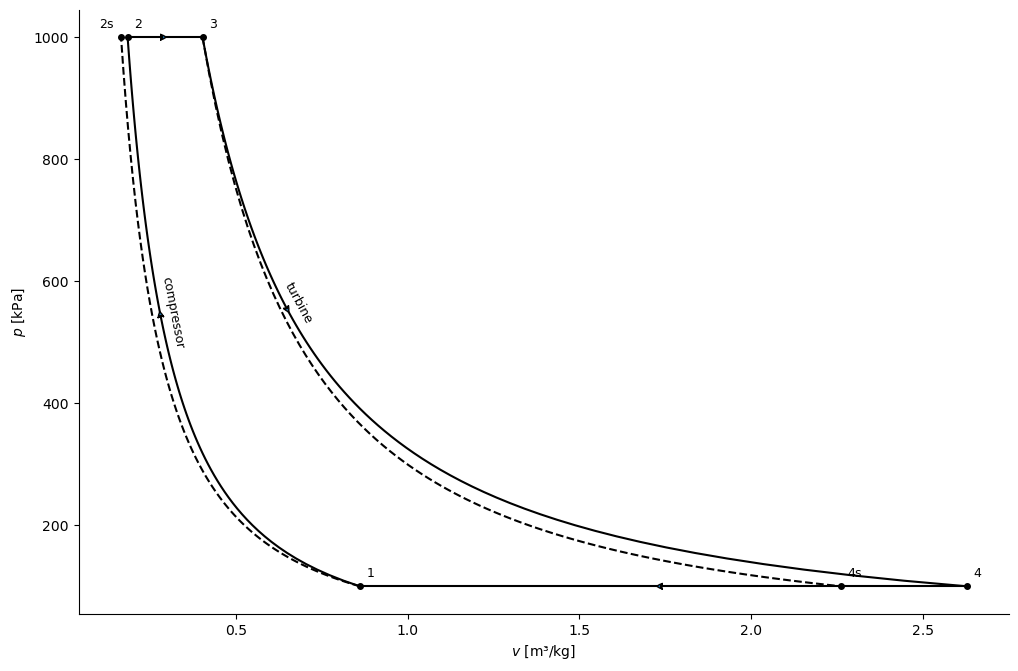

In [6]:
pv = air.pv_diagram(saturation=False)

# plot each state on the p,v diagram and calculate the entropy at each state
for i in [1,2,3,'4s',4]:
    v[i] = air.v(T=T[i],p=p[i])
    pv.plot_state(states[i],label_loc='north east')

v['2s'] = air.v(T=T['2s'],p=p['2s'])
pv.plot_state(states['2s'],label_loc='north west')

# plot the process paths
pv.plot_process(states[1],states['2s'],path='isentropic',linestyle='dashed',arrow=False)
pv.plot_process(states[1],states[2],path='nonideal',label='compressor')
pv.plot_process(states[2],states[3],path='isobaric')
pv.plot_process(states[3],states['4s'],path='isentropic',linestyle='dashed',arrow=False)
pv.plot_process(states[3],states[4],path='nonideal',label='turbine')
pv.plot_process(states[4],states[1],path='isobaric');

#### (b) $T$-$s$ diagram
Note: the isentropic lines are not vertical in this diagram because the entropies were 
calculated for variable specific heat, but all other properties were calculated using the
cold-air-standard assumptions (constant specific heat).  Therefore the errors resulting from the constant specific heat assumption are evident in the skewed shape of the cycle on the $T$-$s$ diagram.

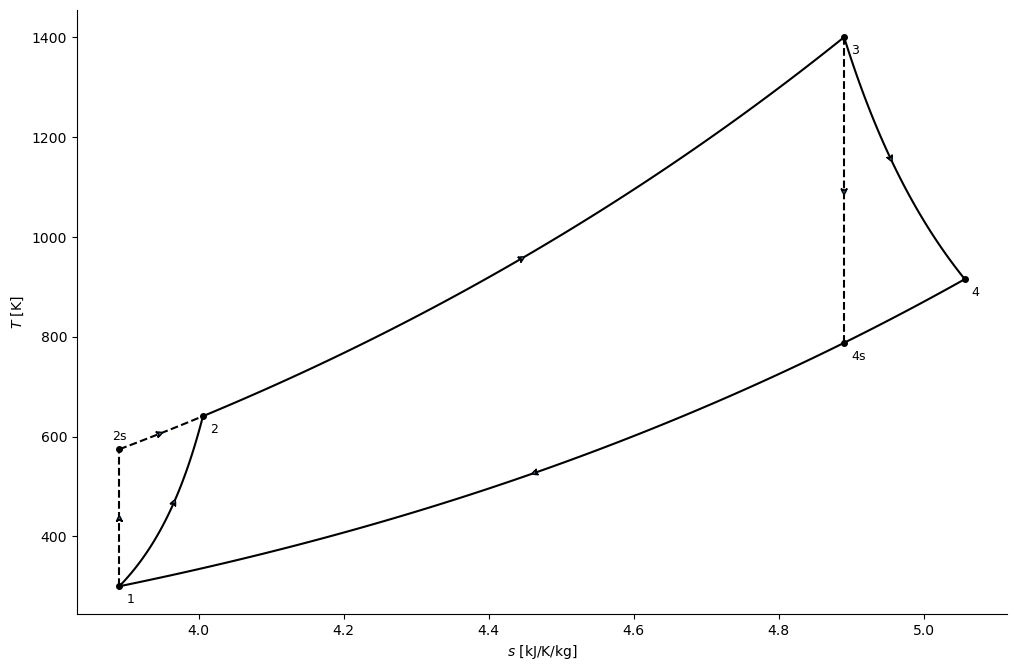

In [7]:
Ts = air.Ts_diagram(saturation=False)

for i in [1,2,3,4]:
    Ts.plot_state(states[i],label_loc='south east')

Ts.plot_state(states['2s'],label_loc='north')
Ts.plot_state(states['4s'],label_loc='south east')
    
Ts.plot_process(states[1],states['2s'],path='isentropic',linestyle='dashed')
Ts.plot_process(states[1],states[2],path='isentropic efficiency')
Ts.plot_process(states['2s'],states[2],path='isobaric',linestyle='dashed')
Ts.plot_process(states[2],states[3],path='isobaric')
Ts.plot_process(states[3],states['4s'],path='isentropic',linestyle='dashed')
Ts.plot_process(states[3],states[4],path='isentropic efficiency')
Ts.plot_process(states[4],states[1],path='isobaric');

In [8]:
Summary();

<IPython.core.display.Latex object>

,T,p,v,h,s,Vdot
unit,K,kPa,m³/kg,kJ/kg,kJ/K/kg,m³/s
1,300.000000,100.0,0.860882,426.300776,3.890501,5
2,640.792264,1000.0,0.184619,776.489114,4.005867,-
2s,574.451983,1000.0,0.165497,706.451446,3.890501,-
3,1400.000000,1000.0,0.402841,1642.536333,4.890246,-
4,915.178601,100.0,2.627873,1076.440588,5.056721,-
4s,787.705929,100.0,2.261898,934.916651,4.890246,-


In [9]:
Summary(['BWR','Wdot_net','eta_th']);

<IPython.core.display.Latex object>